# Exercises

## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot of each pixel. Plotting the temporal trace will allow us to see the calcium transient dinamic, if a pixel belonging to a neuron is selected. 

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are choosen from an active neuron, you will be able to see the calcium transcient dynamic. Try this a few time to appreciate the results.

**B.** Temporal statistics of pixel activation
 * For the selected pixels, plot the histogram of pixel value. What are the difference in different regions?, and how can that help to distinguish a pixel that belongs to aneuron from a background pixel?

* If we can already see the calcium traces from individual pixels, why do we need to run source extraction to segment the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces of the pixels? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from caiman import load

sns.set_theme(context='notebook',style='white',font_scale=1.5)

In [2]:
# set path to video of the full field of view
input_tif_file_path_FOV = 'data/calcium_video.tif'   
input_tif_file_path = 'data/caiman_video_trial_0.tif'  

video = load(input_tif_file_path) # time x height x width


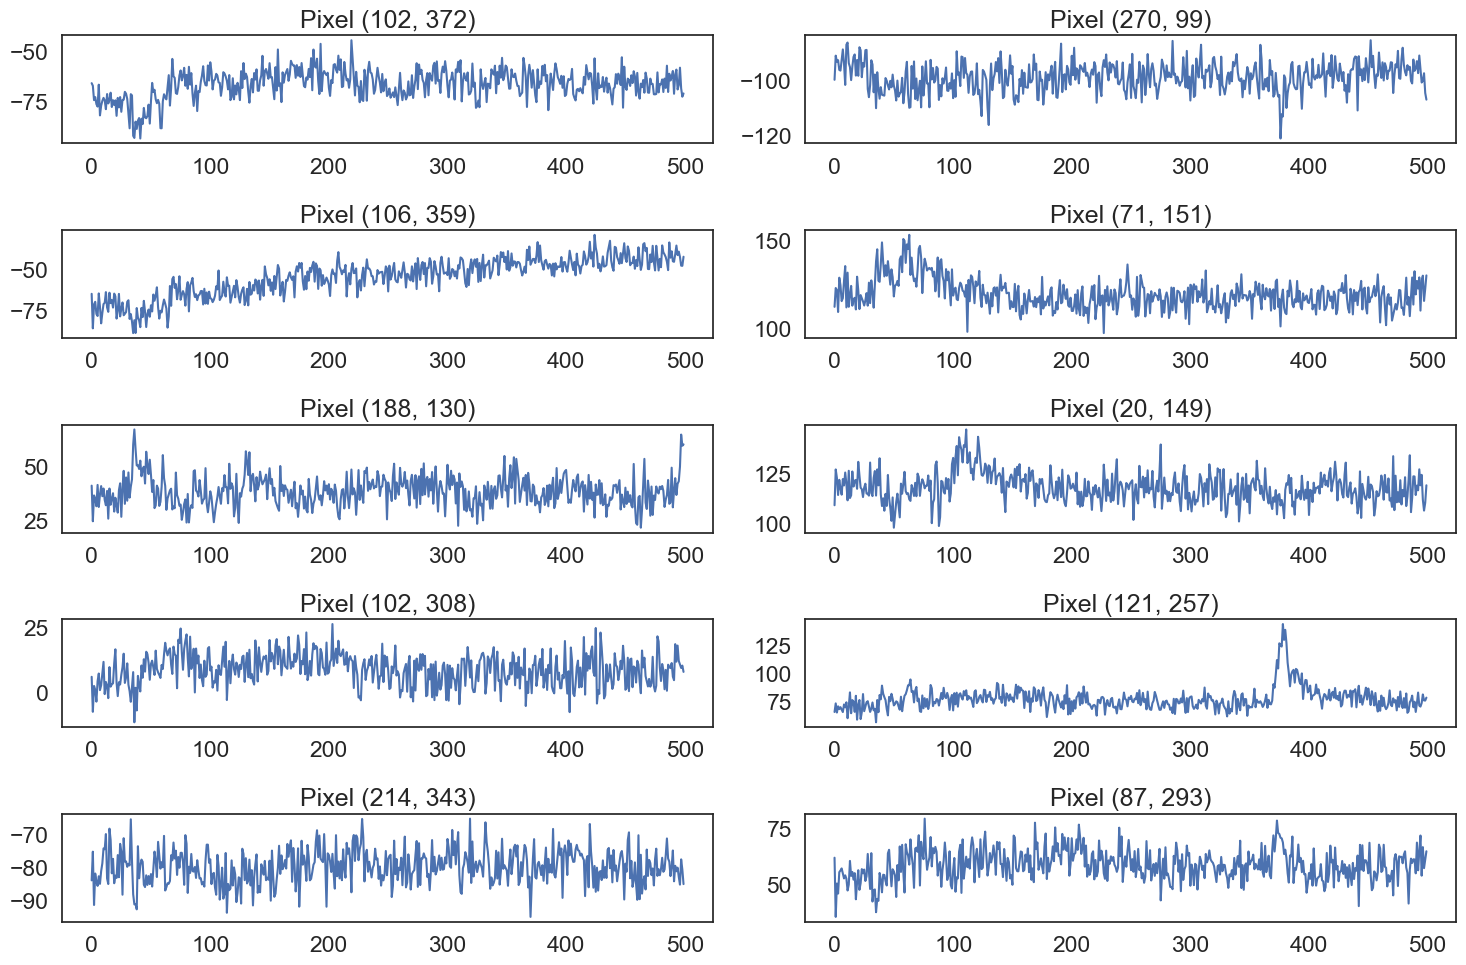

In [3]:
# random seed for reproducibility
np.random.seed(42)

# set parameters
N = 10 # number of pixels 
T, x_dim, y_dim = video.shape
time = np.arange(T)

# select random pixels
pixel_x = np.random.randint(0, video.shape[1], size = 10)
pixel_y = np.random.randint(0, video.shape[2], size = 10)

# normalize video for mean brightness per time frame to account for brightness variability over time
video_2d = np.reshape(video, (T, x_dim * y_dim))
mean_brightness = video_2d.mean(axis = 1)
video_normalized = video - mean_brightness[:, None, None]

# plot the time series of the randomly selected pixels
plt.figure(figsize=(15, 10))

for i in range(N):
    plt.subplot(int(N/2), 2, i+1)
    plt.plot(time, video_normalized[:, pixel_x[i], pixel_y[i]]) 
    plt.title(f'Pixel ({pixel_x[i]}, {pixel_y[i]})')

plt.tight_layout()
plt.show()


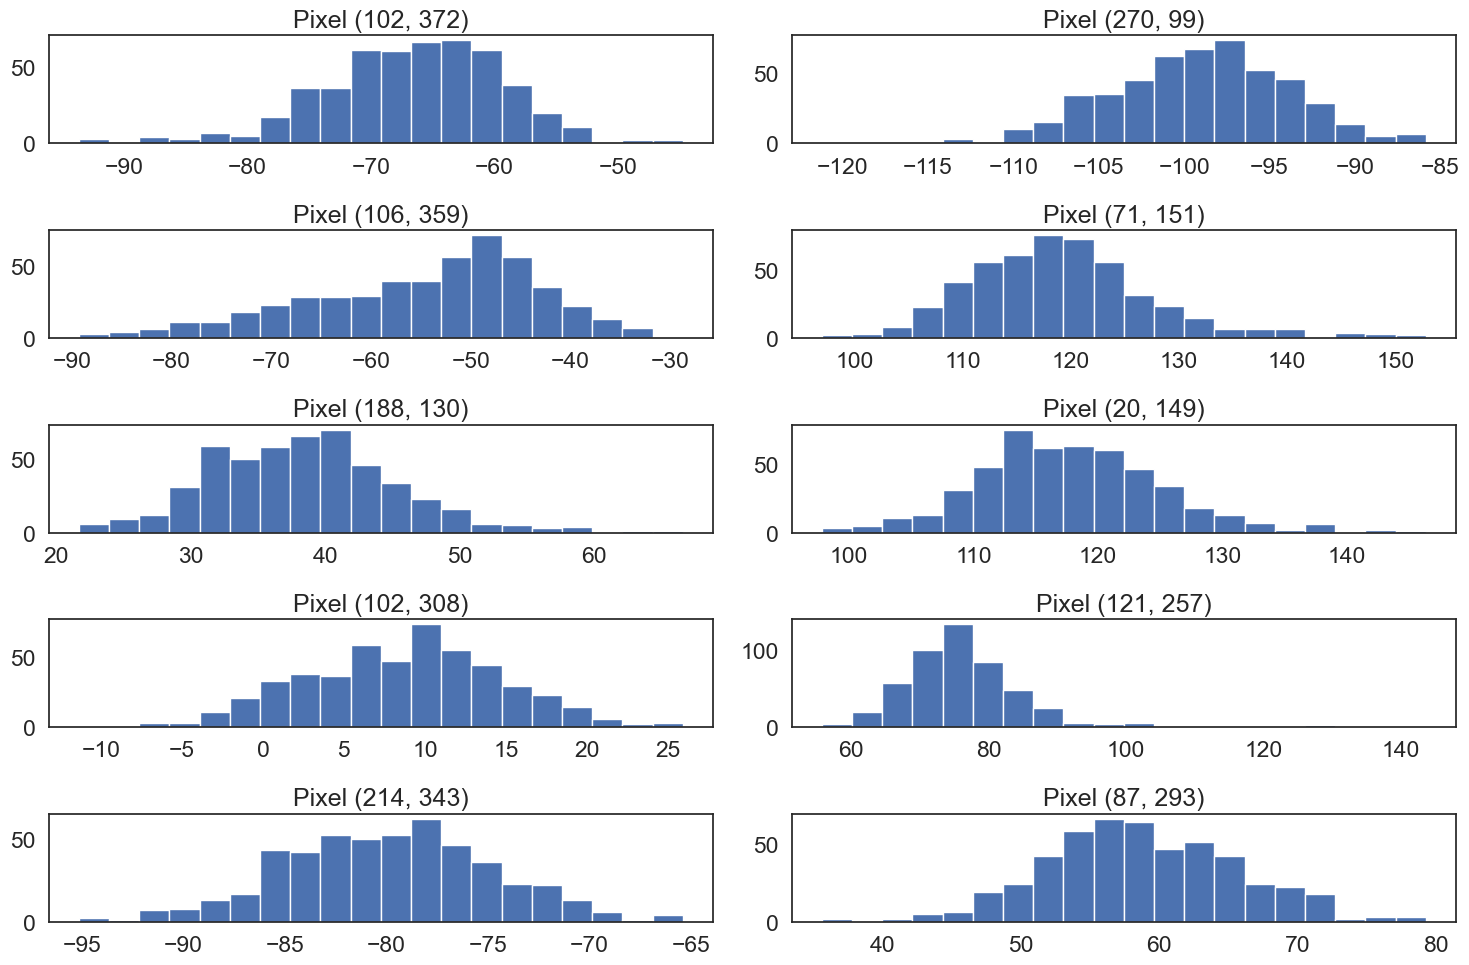

In [4]:
# plot histograms

plt.figure(figsize=(15, 10))

for i in range(N):
    plt.subplot(int(N/2), 2, i+1)
    plt.hist(video_normalized[:, pixel_x[i], pixel_y[i]], bins = 20) # (232, 272)
    plt.title(f'Pixel ({pixel_x[i]}, {pixel_y[i]})')


plt.tight_layout()
plt.show()

### Notes:

The histograms of the pixels that were sampled from neurons show more outliers to the right of the distribution. This is likely due to the short peaks of intense light in contrast to the background pixels. For instance, we can see that the pixel at (121, 257) shows a far greater tail to the right than the other distributions and for this pixel we can also detect a clear calcium transient at around 380 ms.

Working with pixel data only increases the signal to noise ratio which can be reduced by grouping together groups of pixels and analysing them together as neurons. Moreover, from a theoretical point of view it makes more sense to detect neurons and analyse them as units of measurements since these are the objects of interest in calcium imaging or neuroscience in general.

## Exercise 2: motion correction parameters
---

One parameter that impacts motion correction performance is the size of the spatial filter that is applyed to the video.

* Use the following function from CaImAn and plot the result of different space filtering applyed to a single frame of the video:from caiman.motion_correction import high_pass_filter_space

* How will this filtering affect the measure of crispness?

* Acording to Pnevmatikakis et al, which other factors are relevant for pw-rigid motion correction?

- Explore the impact of different parameters in the output of motion correction algorithm by measuring crispness in the correlation image of the final outcome. Particularly measure the effect of different spatial filter size by applying motion correction algorithm multiple times and computing the crispness of the output video. 

- Display all crispness values for rigid and not rigid motion correction and plot them agains gSig_filters values.

- If possible, show the impact of the crispness value that comes from changing other relevant paraments.

*Note1: The is no need to save all the motion corrected movies, just save the cripsness values.*

*Note2: gSig_filters is an optional range of posible values, but if your computer gets to slow in the computation reduce the range.*


## Exercise 3: Source extraction parameters 
---

* For a fixed minimum correlation value (ie 0.6) select a range of possible PNR minimun values and study the impact of those in the final source extraction output.

* For a fixed value of PNR (ie 6) select a range of minimum correlation valur and study the impact of those in the final source extraction output.

* How do these paramenters affect the spatial sparcity of the output? Which set of parameter selection procedes the higher number of neurons? Is maximal number of neurons always better? Why?  

* Generate a plot of number of neurons vs PNR (or min corr value) to show how these parameters affect the source extracted signals.

* Are the temporal traces affected by these parameters?

* For different PNR and minimum correlation value plot the correlation image and the selected cells.